In [1]:
import matplotlib
from cornerplot import Cornerplots
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('thesis')

In [14]:
f_pred = 10**(np.load("/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr_pred.npy"))
f_true = 10**(np.load("/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr_true.npy"))
data_pred = dict(zip(['l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10'], f_pred.T))
data_true = dict(zip(['l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10'], f_true.T))

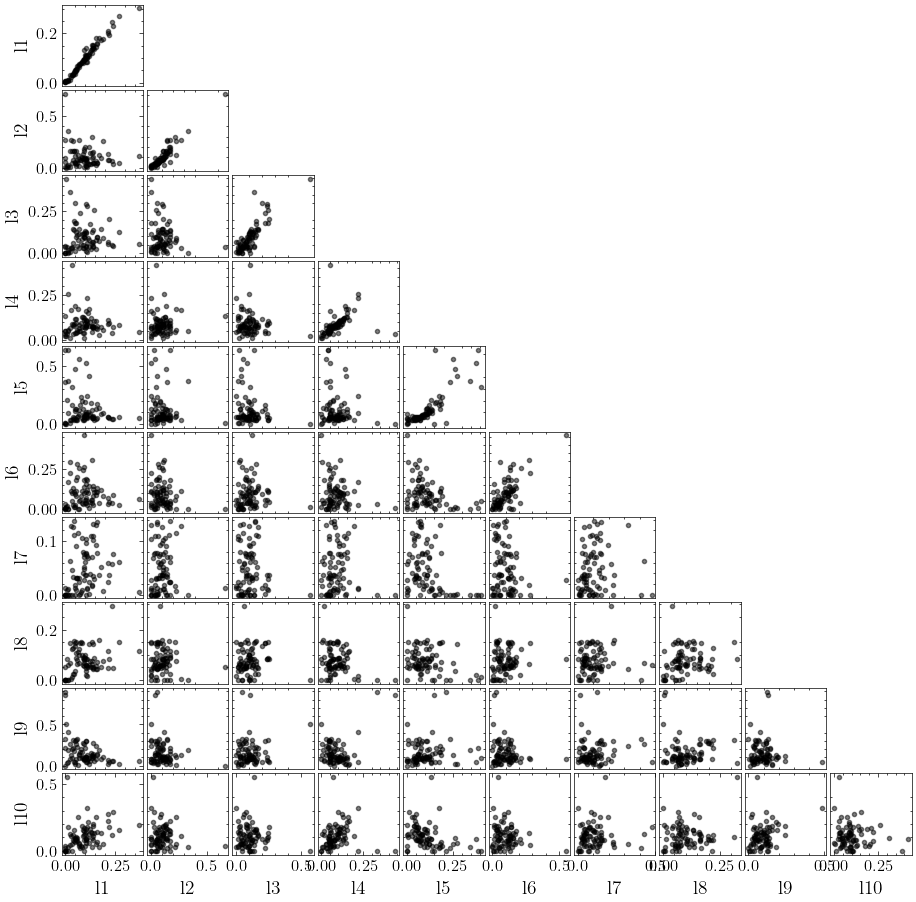

In [15]:
fig = plt.figure(figsize=(10,10))
cp = Cornerplots(fields = list(data_true.keys()), 
                 labels = list(data_true.keys()),
                 fig = fig,
                 sharexy=True,
                 subplots_adjust=(.1, .1, .95, .95, .05, .05))
cp.plot(data_true,
        data_pred,
        'k.',
        alpha = 0.5)
plt.show()

In [17]:
t0 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr_true.npy'))
t50 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr50_true.npy'))
t100 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr100_true.npy'))
f0 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr_pred.npy'))
f50 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr50_pred.npy'))
f100 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noiseless-training/snr100_pred.npy'))

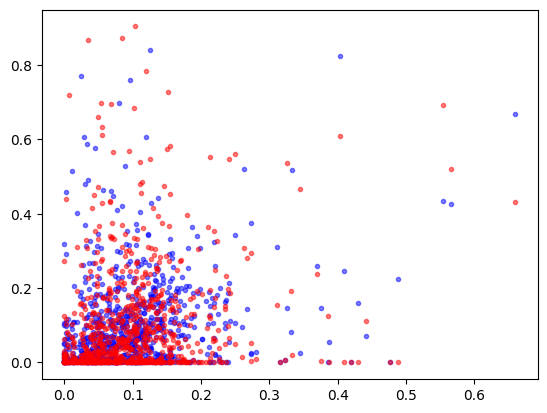

In [18]:
plt.plot(t100, f100, 'b.', label='SNR=100', alpha=0.5)
plt.plot(t50, f50, 'r.', label='SNR=50', alpha=0.5)
#plt.plot(t0, f0, 'k.', label='Noiseless', alpha=0.5)
plt.show()

In [12]:
fn50 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noisy-training/snr50_pred.npy'))
fn100 = 10**(np.load('/avatar/vmehta/sfh_100_20260210_145608/noisy-training/snr100_pred.npy'))

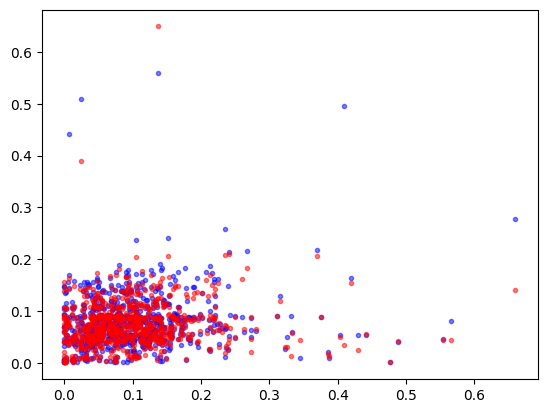

In [16]:
plt.plot(t100, fn100, 'b.', label='SNR 100', alpha=0.5)
plt.plot(t50, fn50, 'r.', label='SNR 50', alpha=0.5)
#plt.plot(t0, f0, 'k.', label='Noiseless', alpha=0.5)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error


def rmse(targets, predictions, with_z=False):
    rmse = np.sqrt(mean_squared_error(targets, predictions, multioutput='raw_values'))
    if with_z:
        overall_sfh = np.sqrt(mean_squared_error(targets[:,:10], predictions[:,:10]))
        overall_z = np.sqrt(mean_squared_error(targets[:,10:], predictions[:,10:]))
        overall_rmse = (overall_sfh, overall_z)
    else:
        overall_rmse = np.sqrt(mean_squared_error(targets, predictions))
    return rmse, overall_rmse

bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

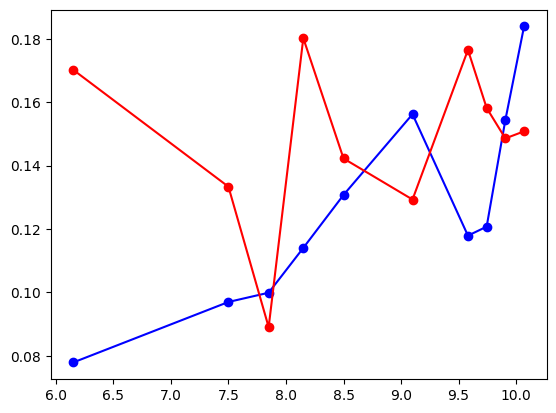

In [28]:
plt.plot(bin_centers, rmse(t100, f100)[0], 'b-o', label='SNR=100')
plt.plot(bin_centers, rmse(t50, f50)[0], 'r-o', label='SNR 50')

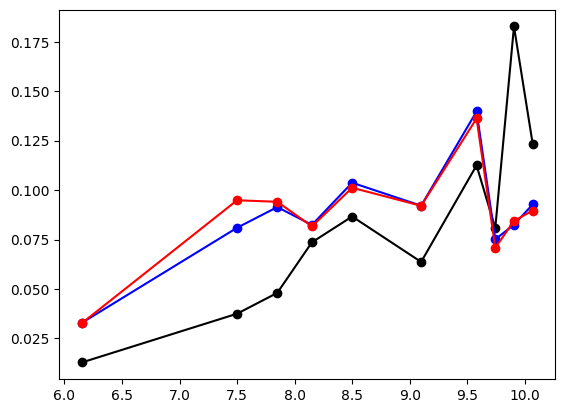

In [32]:
plt.plot(bin_centers, rmse(t0, f0)[0], 'k-o', label='SNR=0 overall')
plt.plot(bin_centers, rmse(t100, fn100)[0], 'b-o', label='SNR=100')
plt.plot(bin_centers, rmse(t50, fn50)[0], 'r-o', label='SNR 50')